Практическая задача № 2 вариант 17
===============
Выполнил студент 303 группы Черный Илья
-------------------
# 1. Постановка задачи
Используя метод переменных направлений, решить краевую задачу:
$$
    \begin{cases}
        \displaystyle \frac{\partial u}{\partial t}=\Delta u + t\sin x\cos y,\quad 0<x<\pi,\ 0<y<\pi,\ t>0\\
        \displaystyle u|_{x=0}=u|_{x=\pi}=0\\
        \displaystyle \frac{\partial u}{\partial y}\bigg|_{y=0}=\frac{\partial u}{\partial y}\bigg|_{y=\pi}=0\\
        \displaystyle u|_{t=0}=0\\
    \end{cases}
$$
# 2. Аналитическое решение
Решением вспомогательной задачи Штурма-Лиувилля
$$
    \begin{cases}
        \displaystyle \Delta v + \lambda v=0\\
        \displaystyle v|_{x=0}=v|_{x=\pi}=0\\
        \displaystyle \frac{\partial v}{\partial y}\bigg|_{y=0}=\frac{\partial v}{\partial y}\bigg|_{y=\pi}=0\\
    \end{cases}
$$
является
$$
    v_{nm}=\sin nx \cos my, \quad n=1,\dots\ m=0,\dots\\    
$$
ищем $u$ в виде $\sum v_{nm}(x,\ y)T_{nm}(t)$:
$$
    T^{'}_{nm}v_{nm}=-(n^2+m^2)T_{nm}v_{nm}+tv_{11}\\
$$
Из-за однородного НУ все $T_{nm}$, кроме $T_{11}$ тождественные нули.
$$
    T_{11}(t)=\int\limits^{t}_{0}\exp(-2(t-\tau))\tau d\tau=\frac{1}{4}\bigg(\exp(-2t)-1+2t\bigg)\\
$$
Так, 
$$
    u=\sin x\cos y\frac{1}{4}\bigg(\exp(-2t)-1+2t\bigg)\\
$$

<IPython.core.display.Javascript object>


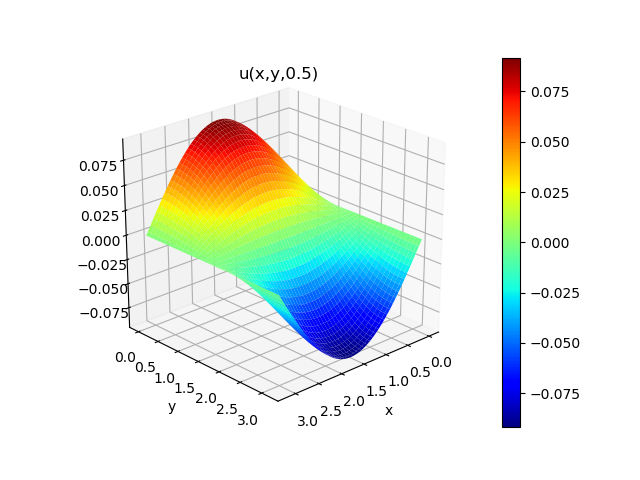

In [48]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

#import math

#шаги
N = 100; M=108#J = 1000 

#max|min x,y
xmax=np.pi; xmin=0;           
#tmax=5; tmin=0  
ymax=np.pi; ymin=0

# T
t=0.5

#сетка
gr_x=np.linspace(xmin, xmax, N)
gr_y=np.linspace(ymin, ymax, M)
#gr_t=np.linspace(tmin, tmax, J) 

#массив для сеточной ф-ии z(x,y)
z=np.zeros((N,M))      

#длины шагов
hx=gr_x[1]-gr_x[0]
hy=gr_y[1]-gr_y[0]      
#print(hx, ht)

#начальные/граничные условия
#y[0,:]=np.sin(np.pi*gr_x/2)
#y[:,0]=0
#print(y)

#собственно схема
def sch(a,b): 
    return (np.sin(xmin+a*hx)*np.cos(ymin+b*hy)/4*(2*t-1+np.exp(-2*t)))
for i in range (0,N):
    for k in range (0,M):
        z[i,k]=sch(i,k)
        #print(y[k,i])
        
#визуализация 
from mpl_toolkits.mplot3d import axes3d

y, x = np.meshgrid(gr_y, gr_x)
fig = plt.figure()
o1 = fig.add_subplot(111, projection = '3d')
p1 = o1.plot_surface(x, y, z, cmap = 'jet')
o1.view_init(25, 47)
plt.title('u(x,y,'+str(t)+')(Аналитическое)')
plt.xlabel('x')
plt.ylabel('y')
fig.colorbar(p1)
plt.show()

<IPython.core.display.Javascript object>


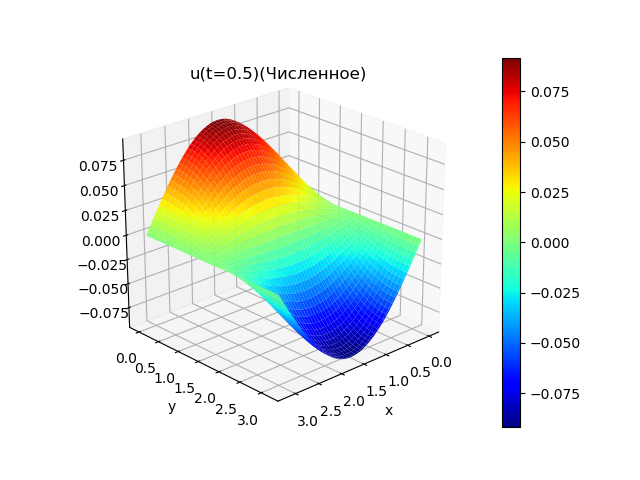

<IPython.core.display.Javascript object>


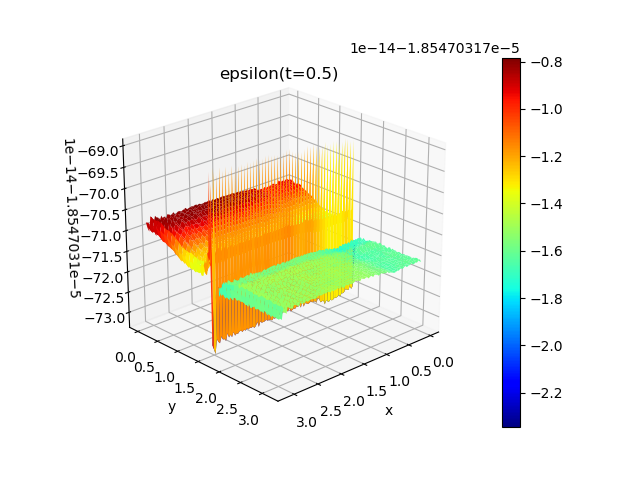

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

#import math

#шаги
N = 100; M=110; J = 200

#max|min x,y
xmax=np.pi; xmin=0;           
tmax=0.5; tmin=0  
ymax=np.pi; ymin=0

#длины шагов
hx=(xmax-xmin)/(N-1)
hy=(ymax-ymin)/(M-2)


#сетка
gr_x=np.linspace(xmin, xmax, N)
gr_y=np.linspace(ymin-hy/2, ymax+hy/2, M)
gr_t=np.linspace(tmin, tmax, 2*J+1) 
ht=gr_t[1]-gr_t[0]
#print(hx,hy,ht)

#массив для сеточной ф-ии z(x,y,t)
z=np.zeros((N,M,2*J+1))      
#print(z)

#функция прогонки, аргументы - массивы коэффициентов, возвращает строку значений сеточной функции
def progonka (a,b,c,f):
    count=len(c)
    alpha=np.zeros(count)
    beta=np.zeros(count)
    result=np.zeros(count)
    alpha[0]=b[0]/c[0]
    beta[0]=f[0]/c[0]
    for i in range(1,count):
        alpha[i]=b[i]/(c[i]-a[i]*alpha[i-1])
        beta[i]=(f[i]+a[i]*beta[i-1])/(c[i]-a[i]*alpha[i-1])
    result[count-1]=beta[count-1]
    for i in range(count-2,-1,-1):
        result[i]=alpha[i]*result[i+1]+beta[i]
    return result

#лаплас в сетке, получает три строки значений сеточной ф-ии и шаг между ними по координате,
#возвращает одномерный лаплас в средней строке
def lap(a,b,c,h):
    count=len(a)
    result=np.zeros(count)
    result=(a-2*b+c)/h**2
    return result

#значения коэффициентов для прогонки, благо, они постоянные
ax=[ht/hx**2]*N; ax[0]=0; ax[N-1]=0
bx=[ht/hx**2]*N; bx[0]=0; bx[N-1]=0
cx=[1+2*ht/hx**2]*N; cx[0]=1; cx[N-1]=1

ay=[ht/hy**2]*M; ay[0]=0; ay[M-1]=1
by=[ht/hy**2]*M; by[0]=1; by[M-1]=0
cy=[1+2*ht/hy**2]*M; cy[0]=1; cy[M-1]=1

#теперь коэффициент, который нужно считать
#my - номер слоя по у, значение от 1 до М-2
#jt - номер слоя по t, нечётное число от 1 до 2J-1
def Fx(my,jt):
    result=np.zeros(N)
    result=(tmin+ht*(jt))*np.sin(gr_x)*np.cos(gr_y[my])*ht+lap(z[:,my+1,jt-1],z[:,my,jt-1],z[:,my-1,jt-1],hy)*ht+z[:,my,jt-1]
    result[N-1]=0
    result[0]=0
    return result

#nx - номер слоя по x, значение от 1 до N-2
#jt - номер слоя по t, нечётное число от 1 до 2J-1
def Fy(nx,jt):
    result=np.zeros(M)
    result=(tmin+ht*(jt))*np.sin(gr_x[nx])*np.cos(gr_y)*ht+lap(z[nx+1,:,jt],z[nx,:,jt],z[nx-1,:,jt],hx)*ht+z[nx,:,jt]
    result[M-1]=0
    result[0]=0
    return result

#собственно, метод переменных направлений
for o in range(1,2*J+1,2):
    for k in range (1,M-1):
        z[:,k,o]=progonka(ax,bx,cx,Fx(k,o))
    for l in range (1,N-1):
        z[l,:,o+1]=progonka(ay,by,cy,Fy(l,o))

#подсчёт погрешности численного решения относительно аналитического
za=np.zeros((N,M-2))
for i in range(M-2):
    za[:,i]=(np.sin(gr_x)*np.cos(gr_y[i+1])/4*(2*tmax-1+np.exp(-2*tmax)))
epsilon=np.zeros((N-2,M-2))
for i in range(N-2):
    for k in range(M-2):
        if ((za[i+1,k]!=0)and(z[i+1,k+1,2*J]!=0)):
            epsilon[i,k]=(za[i+1,k]-z[i+1,k+1,2*J])/za[i+1,k]
            
            

#визуализация

from mpl_toolkits.mplot3d import axes3d
#само решение
y, x = np.meshgrid(gr_y, gr_x)
fig1 = plt.figure()
o1 = fig1.add_subplot(111, projection = '3d')
p1 = o1.plot_surface(x, y , z[:,:,2*J], cmap = 'jet')
o1.view_init(25, 47)
plt.title('u(t='+str(tmax)+')(Численное)')
plt.xlabel('x')
plt.ylabel('y')
fig1.colorbar(p1) 
plt.show()

#погрешность
gr_y1=np.linspace(ymin+hy/2, ymax-hy/2, M-2)
g, d = np.meshgrid(gr_y1, gr_x[1:N-1])
fig2 = plt.figure()
o2 = fig2.add_subplot(111, projection = '3d')
p2 = o2.plot_surface(d, g, epsilon[:,:], cmap = 'jet')
o2.view_init(25, 47)
plt.title('epsilon(t='+str(tmax)+')')
plt.xlabel('x')
plt.ylabel('y')
fig2.colorbar(p2) 

plt.show()

Стоит пояснить значения последнего графика (относительной погрешности) 1е-14-2.16...е-3 означает, что масштаб шкалы по z — $10^{-14}$ и z показывает отклонение от числа -0,00216... Я не знаю связано ли с чем-то такое странное поведение погрешности, но это значит, что была достигнута точность 0,22%.

# Upd:
я устранил ошибку в коде (плохо посчитал индекс), теперь погрешность порядка $10^{-5}$.